In [1]:
import sys
import pandas as pd
import numpy as np
import scanpy as sc

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.labelsize' : 'large'}) 
from matplotlib.backends.backend_pdf import PdfPages

import sys
import os

import gc
import warnings
import time
import pickle

from adjustText import adjust_text

<h3>Load data</h3>

In [2]:
data_folder="/project/GCRB/Hon_lab/s223695/Data_project/Perturb_seq_edist_pipeline/pipeline_output/"
edist_matrix_file_name = "target_by_target_matrix.csv"
edist_embedding_file_name = "edist_embedding_info.csv"

In [3]:
target_estats = pd.read_csv(os.path.join(data_folder,edist_matrix_file_name),index_col=0)
total_edist_emb = pd.read_csv(os.path.join(data_folder,edist_embedding_file_name),index_col=0)

In [4]:
total_edist_emb = total_edist_emb.set_index("index")

In [5]:
target_estats

,ADNP2:P1P2,AFF4:P1P2,AHCY:P1P2,AHDC1:P1P2,APITD1:P1P2,AR:P1P2,ARID2:P1P2,ARID3A:P1P2,ARID3B:P1P2,ARID4A:P1P2,...,ZNF814:P1P2,ZNF827:P1P2,ZNF831:ENST00000371030.2,ZNF844:P1P2,ZNF850:P1P2,ZNF8:P1P2,ZNF91:P1P2,ZSCAN10:P1P2,ZSCAN20:P1P2,ZSCAN32:P1P2
ADNP2:P1P2,0.000000,22.092773,20.429932,53.992920,43.270508,63.649902,42.548950,37.785156,48.084473,38.380371,...,62.975220,26.748291,43.845703,65.125244,41.870239,52.889282,56.103882,58.981934,64.883057,66.061768
AFF4:P1P2,22.092773,0.000000,6.562256,42.368164,15.295654,31.109375,17.084106,28.737061,27.688477,17.977539,...,35.959839,7.696045,17.457520,38.494385,12.573120,27.655640,25.915649,73.088867,31.149902,39.946289
AHCY:P1P2,20.429932,6.562256,0.000000,41.454590,20.374023,40.027832,31.714478,31.829102,30.120605,19.571289,...,37.893433,12.228516,22.476318,39.220947,17.986450,30.142700,29.194458,86.191406,37.867432,43.765625
AHDC1:P1P2,53.992920,42.368164,41.454590,0.000000,24.610107,22.764160,56.921997,21.028320,18.980225,17.523682,...,15.590942,45.269287,22.054688,16.294189,26.356812,19.395874,20.636841,175.707275,22.978271,18.243896
APITD1:P1P2,43.270508,15.295654,20.374023,24.610107,0.000000,5.964600,29.944458,15.117676,8.630615,5.716309,...,9.490845,17.004639,2.031006,9.672119,4.388794,4.610229,4.034058,132.947998,5.915039,9.870361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF8:P1P2,52.889282,27.655640,30.142700,19.395874,4.610229,5.377563,45.197510,13.629517,5.676147,3.632202,...,6.473877,27.653687,3.220337,3.519409,7.336670,0.000000,2.518311,164.056763,6.135376,4.957886
ZNF91:P1P2,56.103882,25.915649,29.194458,20.636841,4.034058,3.881714,40.963623,18.748901,9.098999,5.893188,...,6.423828,26.051392,2.757446,4.785278,5.095459,2.518311,0.000000,166.137085,5.306519,5.278442
ZSCAN10:P1P2,58.981934,73.088867,86.191406,175.707275,132.947998,167.248291,75.925415,128.093506,152.180664,137.145508,...,177.909302,89.773682,137.989990,192.801758,130.148560,164.056763,166.137085,0.000000,167.142090,191.636719
ZSCAN20:P1P2,64.883057,31.149902,37.867432,22.978271,5.915039,3.440674,43.406372,18.589111,11.192627,11.871338,...,6.793335,33.067871,5.413330,9.461670,9.473022,6.135376,5.306519,167.142090,0.000000,6.688232


In [6]:
sns.clustermap(target_estats,figsize=(80,80),vmax=100)
#plt.savefig("gene_heatmap_v3.pdf")

/project/GCRB/Hon_lab/s223695/anaconda3/envs/scanpy_gpu/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/project/GCRB/Hon_lab/s223695/anaconda3/envs/scanpy_gpu/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/project/GCRB/Hon_lab/s223695/anaconda3/envs/scanpy_gpu/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/project/GCRB/Hon_lab/s223695/anaconda3/envs/scanpy_gpu/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage 

<h3>Use the best clustering parameter +visualization </h3>

In [7]:
for cluster_index in np.unique(total_edist_emb["cluster"]):
    print(cluster_index,total_edist_emb[total_edist_emb["cluster"]==cluster_index].index.tolist())

0 ['AFF4:P1P2', 'AHCY:P1P2', 'CNBP:P1P2', 'KLF12:P1P2', 'LIN28A:P1P2', 'MAFB:P1P2', 'MEF2D:P1P2', 'MTF2:P1P2', 'NKX2-6:P1P2', 'PREB:P1P2', 'RARA:P1', 'SMAD4:P1P2', 'SUPT4H1:P1P2', 'TCEB3:P1P2', 'WT1:P1P2', 'YWHAE:P1P2', 'ZC3H15:P1P2', 'ZFPM2:P1P2', 'ZIC2:P1P2', 'ZNF787:P1P2']
1 ['ARNT:P1P2']
2 ['ATMIN:P1P2']
3 ['BRPF1:P1P2']
4 ['C11orf95:P1P2', 'L3MBTL3:P1P2', 'MBD6:P1P2', 'PIAS4:P1P2', 'PRDM15:P1P2', 'PSIP1:P1P2', 'SIRT6:P1P2', 'SOX12:P1P2', 'TET2:P1P2', 'TGIF2:P1P2', 'ZEB1:P1', 'ZNF384:P1P2']
5 ['AHDC1:P1P2', 'AR:P1P2', 'ARID3A:P1P2', 'ATXN7:ENST00000398590.3', 'CDK2:P1P2', 'CDX4:P1P2', 'CREBBP:P1P2', 'CSNK2A1:P1P2', 'EP300:P1P2', 'HOXC4:ENST00000430889.2', 'ID2:P2', 'LZTR1:P1P2', 'MIER3:P1P2', 'NFX1:P1P2', 'NOTCH1:P1', 'OVOL1:P1P2', 'PRRX2:P1P2', 'RBPJL:P1P2', 'RREB1:P1P2', 'SP8:P1P2', 'TADA3:P1P2', 'TBX2:P1P2', 'ZFP36L1:P2', 'ZNF358:P1', 'ZNF436:P1', 'ZNF649:P1P2', 'ZNF814:P1P2']
6 ['CHAMP1:P1P2']
7 ['ADNP2:P1P2', 'ARNTL2:P1P2', 'BPTF:P1P2', 'CHD7:P1P2', 'DNAJC1:P1P2', 'FOXA2:P1P2'

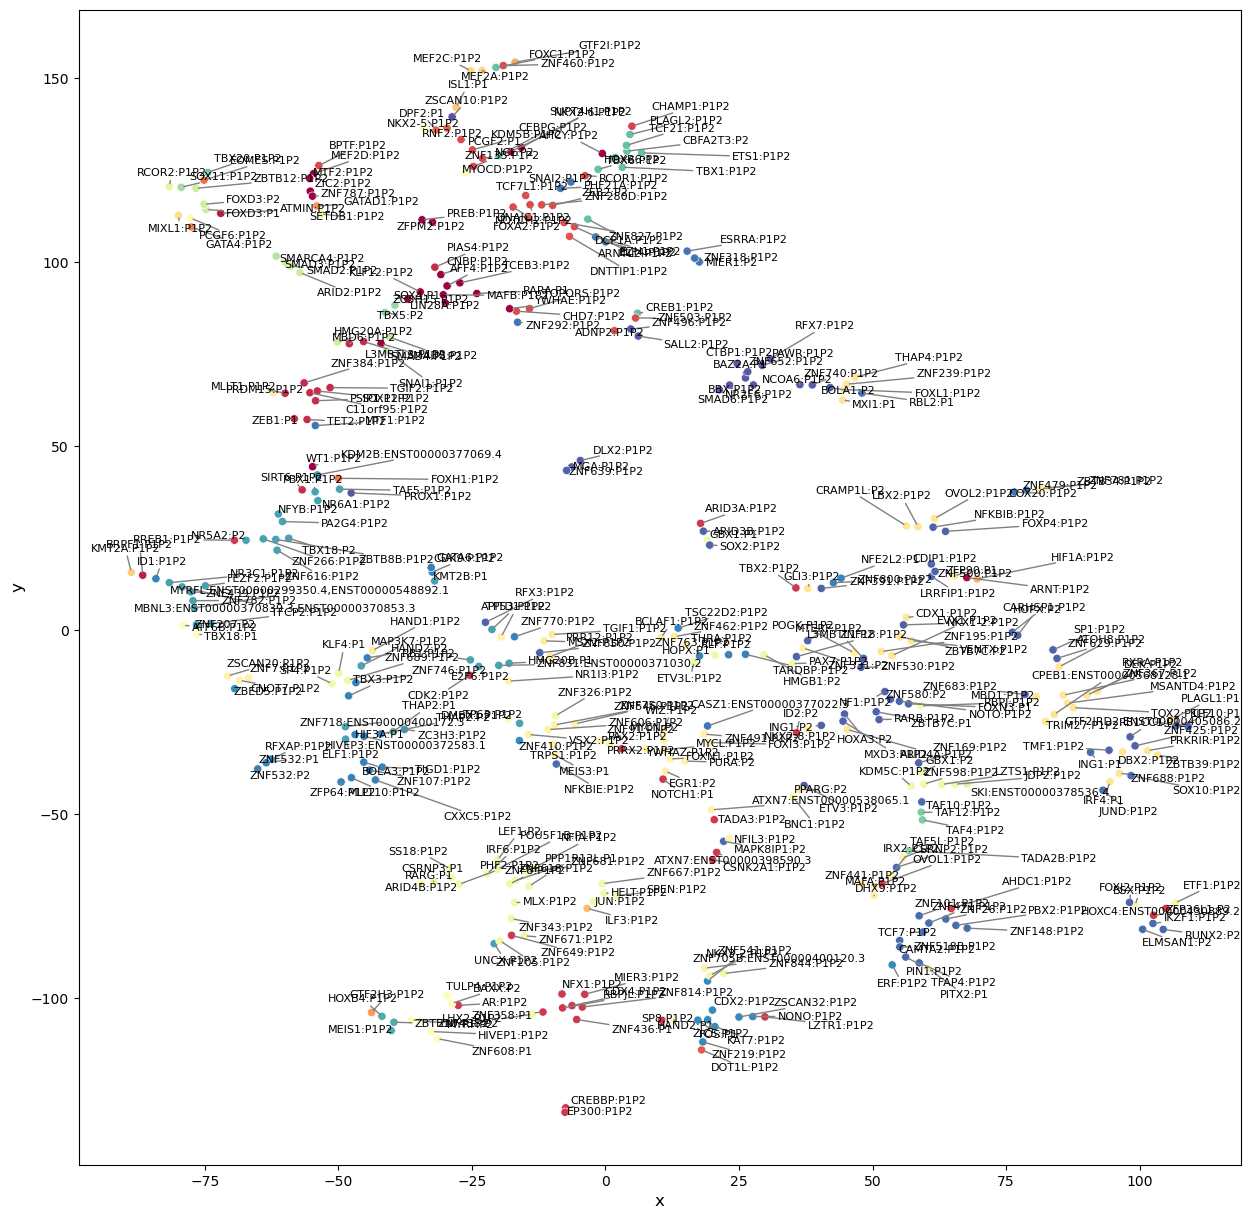

In [8]:
fig,ax= plt.subplots(figsize=(15,15)) 

sns.scatterplot(data=total_edist_emb,x="x",y="y",ax=ax,hue="cluster",
                palette=sns.color_palette("Spectral", as_cmap=True),legend=None)
texts = []
for index,row in total_edist_emb.iterrows():
    plt_text = ax.annotate(index, (row["x"], row["y"]), fontsize=8, color='black')   
    texts.append(plt_text)
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=1),force_text=(0.5, 0.5))